In [1]:
#importing all the necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
body_data_df=pd.read_csv('Dataset2.csv')
body_data_df.head()

body_data_df = pd.DataFrame(body_data_df)
cols = [1,2,3,4,5,6,8,9]
body_data_df = body_data_df[body_data_df.columns[cols]]

body_data_df.sample(5)

,gender_binary,age,weight(kg),height(m),BMI,BMR,activity_level,ideal_weight
2375,0,23,60.608866,1.632754,22.734976,1406.313,1.7,58.649503
1542,1,19,56.778919,1.630953,21.345399,1530.148,1.7,58.520162
4122,0,31,75.107245,1.631675,28.210741,1507.714,1.2,58.571995
446,1,16,53.610560,1.614269,20.573046,1498.799,1.5,57.329007
355,1,15,50.328809,1.592435,19.846916,1449.722,1.9,55.788707


In [14]:
#pre-processing the dataset

features = body_data_df[['gender_binary','age','weight(kg)','height(m)','BMI','BMR','ideal_weight']]
target = body_data_df[['activity_level']]

train_features,test_features,train_target,test_target = train_test_split(features,target, test_size=0.3)

In [15]:
#neural network with 2 dense model and relu activation on nodes

#model = tf.keras.models.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=[len([train_features.keys()])]),tf.keras.layers.Dense(32,activation='relu'),tf.keras.layers.Dense(1)])

model = tf.keras.models.Sequential([tf.keras.layers.Dense(16,activation='relu',input_shape=[7]),tf.keras.layers.Dense(16,activation='relu'),tf.keras.layers.Dense(1)])

In [16]:
#compile the model to train

model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='mean_squared_error',metrics=['mean_squared_error'])

In [17]:
#training the model

#train_features = np.asarray(train_features).astype(np.float32)
#train_target = np.asarray(train_target).astype(np.float32)

#print(type(train_features))
#print(train_features)

train_model = model.fit(train_features,train_target,epochs=150)

Epoch 1/150
165/165 [==============================] - 0s 952us/step - loss: 20.9102 - mean_squared_error: 20.9102
Epoch 2/150
165/165 [==============================] - 0s 931us/step - loss: 10.4685 - mean_squared_error: 10.4685
Epoch 3/150
165/165 [==============================] - 0s 986us/step - loss: 9.3320 - mean_squared_error: 9.3320
Epoch 4/150
165/165 [==============================] - 0s 931us/step - loss: 8.3785 - mean_squared_error: 8.3785
Epoch 5/150
165/165 [==============================] - 0s 1ms/step - loss: 7.7363 - mean_squared_error: 7.7363
Epoch 6/150
165/165 [==============================] - 0s 986us/step - loss: 7.3954 - mean_squared_error: 7.3954
Epoch 7/150
165/165 [==============================] - 0s 931us/step - loss: 6.9192 - mean_squared_error: 6.9192
Epoch 8/150
165/165 [==============================] - 0s 1ms/step - loss: 6.6062 - mean_squared_error: 6.6062
Epoch 9/150
165/165 [==============================] - 0s 986us/step - loss: 6.3983 - mean_squar

165/165 [==============================] - 0s 1ms/step - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 74/150
165/165 [==============================] - 0s 1ms/step - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 75/150
165/165 [==============================] - 0s 892us/step - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 76/150
165/165 [==============================] - 0s 931us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 77/150
165/165 [==============================] - 0s 892us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 78/150
165/165 [==============================] - 0s 931us/step - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 79/150
165/165 [==============================] - 0s 892us/step - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 80/150
165/165 [==============================] - 0s 931us/step - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 81/150
165/165 [==============================] - 0s 1ms/step - loss: 0.0540 - mean_squared_error: 

165/165 [==============================] - 0s 892us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 146/150
165/165 [==============================] - 0s 931us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 147/150
165/165 [==============================] - 0s 931us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 148/150
165/165 [==============================] - 0s 892us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 149/150
165/165 [==============================] - 0s 1ms/step - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 150/150
165/165 [==============================] - 0s 892us/step - loss: 0.0429 - mean_squared_error: 0.0429


In [18]:
# testing the model

test_model = model.predict(test_features).flatten()
test_results_df = pd.DataFrame({'Predicted PAL': test_model,'Actual PAL':test_target.values.flatten()})
test_results_df.head(5)

#print(type(test_features))

# initialize list of lists
#data = [[1,24,83,1.62,31.6,1842,61.5]]
 
# Create the pandas DataFrame
#test_df = pd.DataFrame(data, columns = ['gender_binary','age','weight(kg)','height(m)','BMI','BMR','ideal_weight'])
 
# print dataframe.
#print(test_df)
#test=model.predict(test_df).flatten()
#print(test)

,Predicted PAL,Actual PAL
0,1.349318,1.2
1,1.349318,1.3
2,1.349318,1.5
3,1.349318,1.3
4,1.520809,1.9


In [40]:
#error correction

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
#converting the dataframe to np array

test_results_nparray = test_results_df.to_numpy()
print(type(test_results_nparray))

<class 'numpy.ndarray'>


In [42]:
#split the dataset into test and train sets
    
train_dataset = test_results_df.sample(frac=0.8, random_state=0)
test_dataset = test_results_df.drop(train_dataset.index)

train_dataset.sample(5)

,Predicted PAL,Actual PAL
1969,1.386688,1.3
2197,1.520636,1.3
1091,1.349318,1.5
1455,1.519567,1.7
478,1.349318,1.5


In [43]:
#converting the dataframe datasets to np array

train_dataset_array = train_dataset.to_numpy()
test_dataset_array = test_dataset.to_numpy()

In [44]:
#linear regression model
reg_model = linear_model.LinearRegression()

In [45]:
#training feature extraction
real_pal = []
cor_pal=[]
for x in train_dataset_array:
    real_pal.append(x[0])
    cor_pal.append(x[1])

In [46]:
#training the linear reg model

real_pal_np=np.array(real_pal)
cor_pal_np=np.array(cor_pal)

real_pal_feature = real_pal_np.reshape(-1,1)
cor_pal_feature = cor_pal_np.reshape(-1,1)

print(real_pal_feature)
reg_model.fit(real_pal_feature,cor_pal_feature)

[[1.34931803]
 [1.4990567 ]
 [1.40676355]
 ...
 [1.38731956]
 [1.34931803]
 [1.50220633]]


LinearRegression()

In [47]:
#testing the linear reg model

test_pal=[]
test_pal_cor=[]

for i in test_dataset_array:
    test_pal.append(i[0])
    test_pal_cor.append(i[1])
    
print(len(test_pal))

test_pal_np=np.array(test_pal)
test_pal_shaped= test_pal_np.reshape(-1,1)

test_pal_cor_np=np.array(test_pal_cor)
test_pal_cor_shaped= test_pal_cor_np.reshape(-1,1)

model_predicts = reg_model.predict(test_pal_shaped)

451


Coefficients: 
 [[1.16585402]]
Mean squared error: 0.00
Coefficient of determination: 0.20


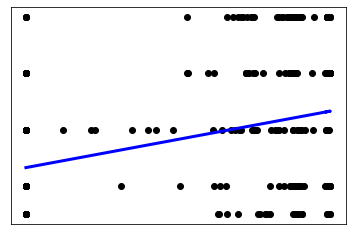

In [48]:
# The coefficients
print("Coefficients: \n", reg_model.coef_)

# The mean squared error (0 the better)
print("Mean squared error: %.2f" % mean_squared_error(test_pal_shaped, model_predicts))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_pal_cor_shaped, model_predicts))

# Plot outputs
plt.scatter(test_pal_shaped, test_pal_cor_shaped, color="black")
plt.plot(test_pal_shaped, model_predicts, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [52]:
test1=reg_model.predict([[1.519567]])
print(test1)

[[1.56426783]]
